In [5]:
import numpy as np
import awkward as ak
import uproot
import src.functions as fn
from pylab import cm
import matplotlib.pyplot as plt
import src.Network as net
import sys
import time
from mpl_toolkits.mplot3d import Axes3D

In [6]:
%matplotlib notebook

import mplhep as hep

# Make plots look more HEP-like
plt.style.use(hep.style.ROOT)

In [ ]:
fileName="/eos/user/c/chpapage/TICL_samples/CloseByDoubleGamma_E100Eta1p62Delta2_CMSSW_12_4_0_upgrade2026_D86_clue3Dv4_ntuples/220701_225819/0000/ntuples.root"
fileNameDelta5="/eos/user/c/chpapage/TICL_samples/CloseByDoubleGamma_E100Eta1p62Delta5_CMSSW_12_4_0_upgrade2026_D86_clue3Dv4_ntuples/220701_225928/0000/ntuples.root"
file=uproot.open(fileName)
fileDelta5=uproot.open(fileNameDelta5)

In [ ]:
tracksters=file["ana/tracksters"]
vertices_E = tracksters['vertices_energy'].array()
vertices_indexes = tracksters['vertices_indexes'].array()
vertices_x = tracksters['vertices_x'].array()
vertices_y = tracksters['vertices_y'].array()
vertices_z = tracksters['vertices_z'].array()
vertices_layers=tracksters['vertices_layer'].array()
trackster_E=tracksters['raw_energy'].array()
trackster_phi=tracksters['trackster_barycenter_phi'].array()
trackster_eta=tracksters['trackster_barycenter_eta'].array()

trackstersD5=fileDelta5["ana/tracksters"]
verticesD5_E = trackstersD5['vertices_energy'].array()
verticesD5_indexes = trackstersD5['vertices_indexes'].array()
verticesD5_x = trackstersD5['vertices_x'].array()
verticesD5_y = trackstersD5['vertices_y'].array()
verticesD5_z = trackstersD5['vertices_z'].array()
verticesD5_layers=trackstersD5['vertices_layer'].array()
tracksterD5_E=trackstersD5['raw_energy'].array()
tracksterD5_EReg=trackstersD5['regressed_energy'].array()
tracksterD5_phi=trackstersD5['trackster_barycenter_phi'].array()
tracksterD5_eta=trackstersD5['trackster_barycenter_eta'].array()


In [ ]:
#%matplotlib inline
plt.figure(figsize=(7,5))
print(ak.count(trackster_E,axis=1))
plt.hist(ak.count(trackster_E,axis=1),bins=3,histtype="step")
plt.hist(ak.count(tracksterD5_E,axis=1),bins=3,histtype="step")
plt.show()

In [ ]:
#%matplotlib inline
plt.figure(figsize=(7,5))
plt.hist(ak.flatten(trackster_E),bins=50,histtype="step")
plt.hist(ak.flatten(tracksterD5_E),bins=50,histtype="step")
plt.hist(ak.flatten(tracksterD5_EReg),bins=50,histtype="step")
plt.show()

In [ ]:

plt.figure(figsize=(7,5))
plt.hist(ak.flatten(ak.sum(vertices_E,axis=2)),bins=50,histtype="step")
plt.hist(ak.flatten(ak.sum(verticesD5_E,axis=2)),bins=50,histtype="step")
plt.show()

In [ ]:
mask=trackster_E > 30
mask150=trackster_E<150

#trackster_E12=trackster_E1[trackster_E1>30]
print(ak.count(ak.flatten(trackster_E12)))
print(ak.count(ak.flatten(trackster_E)))
print(ak.flatten(trackster_E))
print(ak.count(ak.flatten(trackster_E12))/ak.count(ak.flatten(trackster_E)))


In [ ]:
mask150=trackster_E<150
mask=trackster_E > 30
E150t30mask=(150>trackster_E) & (trackster_E > 30)

In [ ]:
#%matplotlib inline
plt.figure(figsize=(7,5))
print(ak.flatten(ak.count(vertices_indexes,axis=2)))
print(len(vertices_indexes))
print(len(verticesD5_indexes))
plt.hist(ak.flatten(ak.count(vertices_indexes,axis=2)),bins=10,range=(0,50),histtype="step")
plt.hist(ak.flatten(ak.count(verticesD5_indexes,axis=2)),bins=10,range=(0,50),histtype="step")
plt.show()

In [ ]:
def plotEvent(fig,ax,tracksters,nEvent):
    indexes = tracksters['vertices_indexes'].array()[nEvent]
    x = tracksters['vertices_x'].array()[nEvent]
    y = tracksters['vertices_y'].array()[nEvent]
    z = tracksters['vertices_z'].array()[nEvent]
    E = tracksters['vertices_energy'].array()[nEvent]
    NTracks=len(x)
    #print(NTracks)
    ax.set_xlabel('X (cm)')
    ax.set_ylabel('Y (cm)')
    ax.set_zlabel('Z (cm)')
    colmap = cm.ScalarMappable(cmap=cm.viridis)
    
    for i in range(NTracks):
        yg =ax.scatter(x[i], y[i], z[i], marker='o') 
    
    
    plt.show()

In [ ]:
%matplotlib notebook
plt.style.use("default")
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

plotEvent(fig,ax,tracksters,17)

In [ ]:
print(trackster_E[17])

In [ ]:
mask2=ak.any(E150t30mask,axis=1)
xMasked=vertices_x[mask2]
yMasked=vertices_y[mask2]
zMasked=vertices_z[mask2]
eMasked=vertices_E[mask2]
#print(ak.any(E150t30mask,axis=1))
print(len(xMasked))

In [47]:
def plotOddEvent(fig,ax,xMasked,yMasked,zMasked,nEvent):
    #indexes = tracksters['vertices_indexes'].array()[nEvent]
    x = xMasked[nEvent]
    y = yMasked[nEvent]
    z = zMasked[nEvent]
    #E = tracksters['vertices_energy'].array()[nEvent]
    NTracks=len(x)
    #print(NTracks)
    ax.set_xlabel('X (cm)')
    ax.set_ylabel('Y (cm)')
    ax.set_zlabel('Z (cm)')
    colmap = cm.ScalarMappable(cmap=cm.viridis)
    
    for i in range(NTracks):
        yg =ax.scatter(x[i], y[i], z[i], marker='o') 
    
    
    plt.show()

In [ ]:
%matplotlib notebook
plt.style.use("default")
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
plotOddEvent(fig,ax,xMasked,yMasked,zMasked,20)

In [ ]:

plt.figure(figsize=(7,5))
plt.hist(ak.flatten(ak.count(xMasked,axis=1)),bins=10)
plt.show()

In [ ]:
print(len(ak.count(xMasked,axis=-2)))

In [ ]:
print(ak.count(xMasked,axis=-1))

In [ ]:
print(ak.count(ak.sum(eMasked,axis=-1),axis=1))

In [ ]:

plt.figure(figsize=(7,5))
plt.hist(ak.count(ak.sum(eMasked,axis=-1),axis=1),bins=10)
plt.show()

In [7]:
hackFileName="/eos/user/b/bmaier/ticl_ml_hackathon/samples/landingzone/two_closeby_photons_pu0/ntuples_13801550_555.root"
hackFile=uproot.open(hackFileName)

In [12]:
hackTrackster=hackFile['ticlNtuplizer/tracksters']
hackTrackster.keys()

['event',
 'NClusters',
 'NTracksters',
 'time',
 'timeError',
 'regressed_energy',
 'raw_energy',
 'raw_em_energy',
 'raw_pt',
 'raw_em_pt',
 'barycenter_x',
 'barycenter_y',
 'barycenter_z',
 'trackster_barycenter_eta',
 'trackster_barycenter_phi',
 'EV1',
 'EV2',
 'EV3',
 'eVector0_x',
 'eVector0_y',
 'eVector0_z',
 'sigmaPCA1',
 'sigmaPCA2',
 'sigmaPCA3',
 'id_probabilities',
 'vertices_indexes',
 'vertices_x',
 'vertices_y',
 'vertices_z',
 'vertices_energy',
 'vertices_correctedEnergy',
 'vertices_correctedEnergyUncertainty',
 'vertices_multiplicity',
 'layer_cluster_seed']

[[-66.4, -65.2], [27.7, 24.3, 23.9], ... [-81.8, -91.3, -97.8], [82.1, 84.8]]
[2, 3, 4, 2, 2, 4, 4, 3, 2, 5, 2, 2, 2, 3, ... 3, 2, 2, 4, 2, 2, 2, 2, 2, 3, 1, 3, 2]


<IPython.core.display.Javascript object>


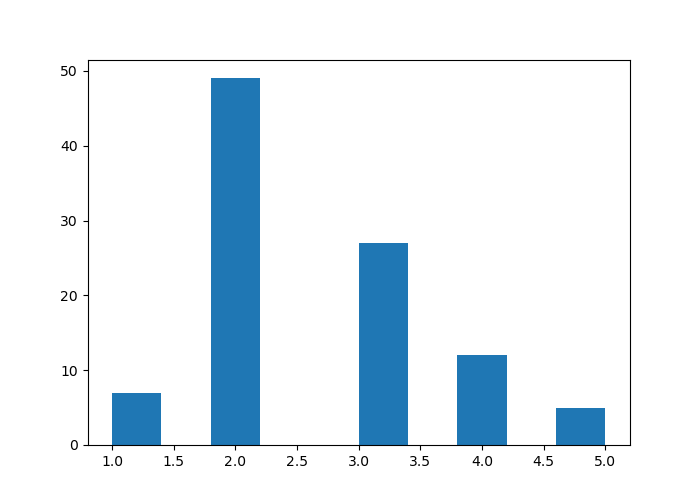

(array([ 7.,  0., 49.,  0.,  0., 27.,  0., 12.,  0.,  5.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

In [70]:
hackBarycenter_x=hackTrackster['barycenter_x'].array()
hackBarycenter_y=hackTrackster['barycenter_y'].array()

print(hackBarycenter_x)
hackBarycenter_R=np.sqrt(hackBarycenter_y**2+hackBarycenter_x**2)
print(ak.count(hackBarycenter_R,axis=-1))
plt.figure(figsize=(7,5))
plt.hist(ak.count(hackBarycenter_R,axis=-1))

In [61]:
ak.sum(np.abs(hackBarycenter_R[:,0]-hackBarycenter_R) < 2.5,axis=1)

<Array [2, 2, 1, 1, 1, 3, ... 1, 1, 1, 1, 1, 2] type='100 * int64'>

<IPython.core.display.Javascript object>


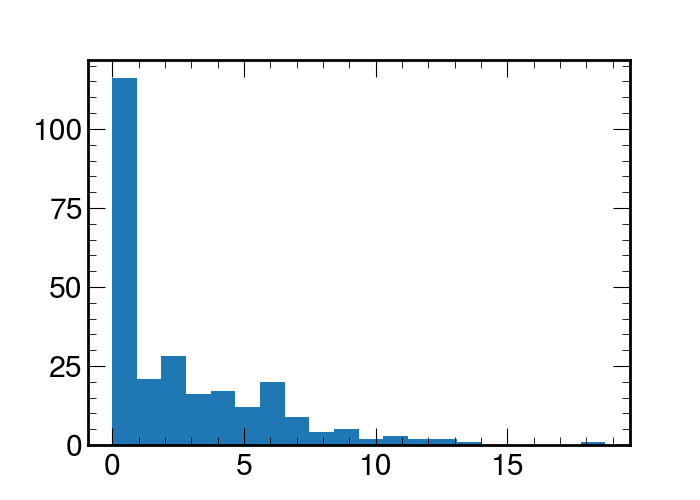

(array([116.,  21.,  28.,  16.,  17.,  12.,  20.,   9.,   4.,   5.,   2.,
          3.,   2.,   2.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([ 0.        ,  0.93602526,  1.8720505 ,  2.8080757 ,  3.744101  ,
         4.680126  ,  5.6161513 ,  6.5521765 ,  7.488202  ,  8.424227  ,
         9.360252  , 10.296278  , 11.232303  , 12.168328  , 13.104353  ,
        14.040379  , 14.976404  , 15.912429  , 16.848454  , 17.78448   ,
        18.720505  ], dtype=float32),
 <a list of 20 Patch objects>)

In [40]:
plt.figure(figsize=(7,5))
plt.hist(ak.flatten(np.abs(hackBarycenter_R[:,0]-hackBarycenter_R)),bins=20)

In [27]:
ak.count(hackBarycenter_R)

259

In [75]:
mask=ak.all(np.abs(hackBarycenter_R[:,0]-hackBarycenter_R)<2,axis=1)
print(ak.sum(mask))

20


In [76]:
hackMasked_x=hackTrackster['vertices_x'].array()[mask]
hackMasked_y=hackTrackster['vertices_y'].array()[mask]
hackMasked_z=hackTrackster['vertices_z'].array()[mask]

In [77]:
print(hackMasked_x[0,])

[[-42.8, -42.8, -43.1, -43.3, -43.5, -44.7, ... -38.6, -42.3, -42.3, -41.3, -42.6]]


In [78]:
def plotOddHackEvent(fig,ax,xMasked,yMasked,zMasked,nEvent):
    #indexes = tracksters['vertices_indexes'].array()[nEvent]
    x = xMasked[nEvent]
    y = yMasked[nEvent]
    z = zMasked[nEvent]
    #E = tracksters['vertices_energy'].array()[nEvent]
    NTracks=len(x)
    #print(NTracks)
    ax.set_xlabel('X (cm)')
    ax.set_ylabel('Y (cm)')
    ax.set_zlabel('Z (cm)')
    colmap = cm.ScalarMappable(cmap=cm.viridis)
    
    for i in range(NTracks):
        yg =ax.scatter(x[i], y[i], z[i], marker='o') 
    
    
    plt.show()

In [79]:
print(len(hackMasked_x))

20


<IPython.core.display.Javascript object>


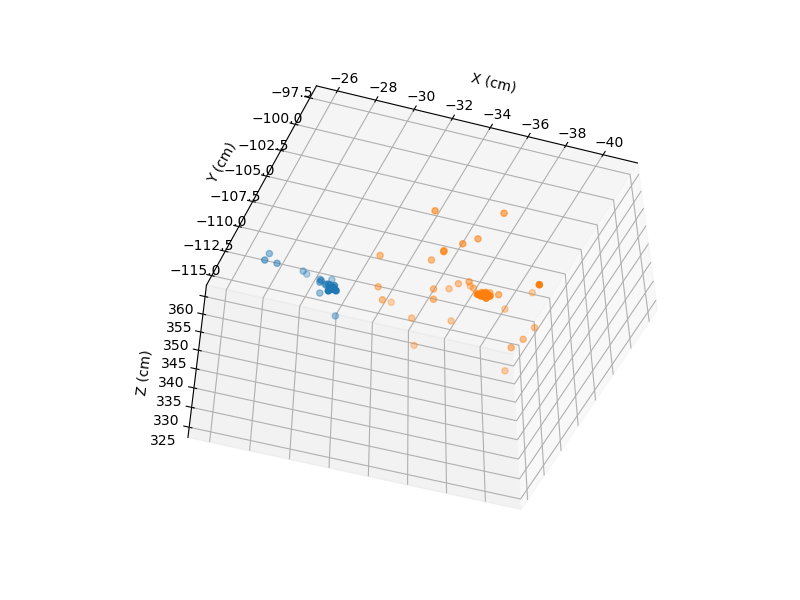

[109, 109]


In [88]:
%matplotlib notebook
plt.style.use("default")
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
n=6
plotOddEvent(fig,ax,hackMasked_x,hackMasked_y,hackMasked_z,n)
print(hackBarycenter_R[mask][n])

In [92]:
hackBarycenter_R=np.sqrt((hackBarycenter_y[:,0]-hackBarycenter_y)**2+(hackBarycenter_x-hackBarycenter_x)**2)

In [101]:
mask2=ak.any((hackBarycenter_R <2.5) & (hackBarycenter_R >0),axis=1)

In [102]:
hackMasked2_x=hackTrackster['vertices_x'].array()[mask2]
hackMasked2_y=hackTrackster['vertices_y'].array()[mask2]
hackMasked2_z=hackTrackster['vertices_z'].array()[mask2]

<IPython.core.display.Javascript object>


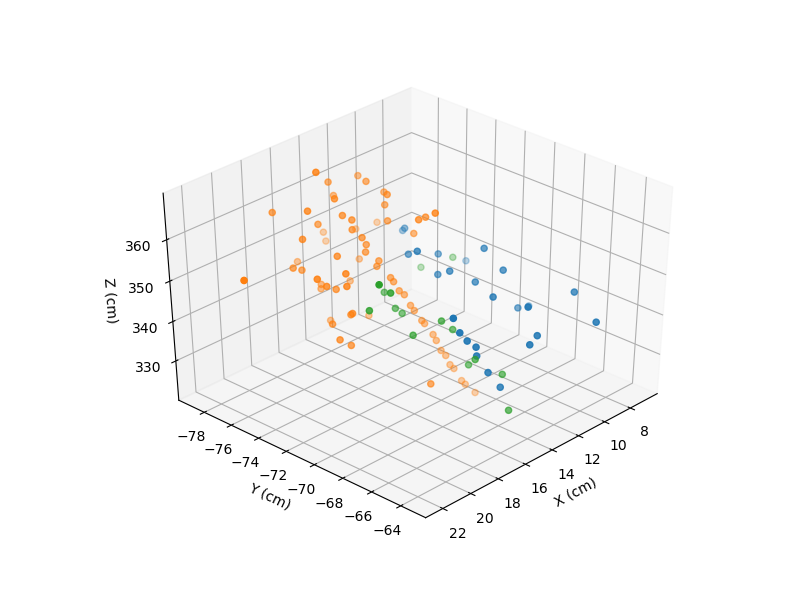

[0, 2.74, 0.944]


In [111]:
%matplotlib notebook
plt.style.use("default")
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
n=7
plotOddEvent(fig,ax,hackMasked2_x,hackMasked2_y,hackMasked2_z,n)
print(hackBarycenter_R[mask2][n])